### Caged - visualização
Arquivo utilizado para a visualização dos dados do CAGED

In [1]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import var as var

In [2]:
dataFrameCAGED = pd.read_csv(f'./result/CAGED.csv')
divisor = 0
showLogs = False

def formatar_rotulos(valor, e):
    return '{:.0f}'.format(valor / divisor)

def makeDic(dados1, dados2, colSum, integer=False, showLogs=True):
    dic1 = {}
    dic2 = {}

    tot1 = 0

    if showLogs:
        print('>> Total:')
        
    for col in dados1['ano'].unique():
        totalAno = dados1[dados1['ano'] == col][colSum].sum()
        dic1[int(col)] = totalAno
        tot1 += totalAno

        if showLogs:
            print('{}: {}'.format(col, totalAno))

    if showLogs:
        print('>> Total: {}\n\n'.format(tot1))

    tot2 = 0
    if showLogs:
        print('>> Computação:')
    for col in dados2['ano'].unique():
        totalComputacao = dados2[dados2['ano'] == col][colSum].sum()
        dic2[int(col)] = totalComputacao
        tot2 += totalComputacao

        if showLogs:
            print('{}: {}'.format(col, totalComputacao))

    if showLogs:
        print('>> Total: {}\n\n'.format(tot2))

    pct = []
    for ano in dic1.keys():
        try:
            conta = round((dic2[int(ano)]*100) / dic1[int(ano)], 1)
        except:
            conta = round((dic2[ano]*100) / dic1[ano], 1)
        

        if integer:
            conta = int(conta)
            
        pct.append(str(conta) + '%')
        
        if showLogs:
            print('{}:\n>>> porcentagem de computação: {}%'.format(ano, conta))

    return dic1, dic2, pct

def makeImg(dfTotal, dfComp, dfColSum, valueDivisor, imgFileName, imgTitle, imgXLabel, imgYLabel, imgSize1, imgSize2, anotate = True, changeXticks = False):
    global divisor
    divisor = valueDivisor

    dicTotal, dicComp, pct = makeDic(dfTotal, dfComp, dfColSum, showLogs=False)
    cores = ['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']
    cores2 = ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']

    fig = plt.figure(figsize=(imgSize1, imgSize2))

    if changeXticks:
        posicoes = np.arange(len(dfTotal['ano'].unique()))
        largura = 0.45
        plt.bar(posicoes, dicTotal.values(), largura, color=cores, label='Total')
        plt.bar(posicoes + largura, dicComp.values(), largura, color=cores2, label='Computação')
        plt.xticks(posicoes + 0.21, dfTotal['ano'].unique())
    else:
        plt.bar(dicTotal.keys(), dicTotal.values(), color=cores, label='Total')
        plt.bar(dicComp.keys(), dicComp.values(), color=cores2, label='Computação')
        plt.xticks(dfTotal['ano'].unique())

    fig.suptitle(imgTitle, size=14)
    plt.xlabel(imgXLabel)
    plt.ylabel(imgYLabel)
    plt.legend()

    if anotate:
        annotateValues = [
            [2008.58, 2009],
            [2009.58, 2010],
            [2010.58, 2011],
            [2011.58, 2012],
            [2012.58, 2013],
            [2013.58, 2014],
            [2014.58, 2015],
            [2015.58, 2016],
            [2016.58, 2017],
            [2017.58, 2018],
            [2018.58, 2019],
            [2019.58, 2020],
        ]

        for i, value in enumerate(annotateValues):
            plt.annotate(pct[i], (value[0], dicComp[value[1]]/2), color='white', size=9.3)

    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatar_rotulos))
    plt.savefig(f'./result/{imgFileName}.png')
    plt.show()

def makeImgSubplot(dfTotal1, dfComp1, dfTotal2, dfComp2, dfColSum1, dfColSum2, imgTitle, imgFileName, imgYLabel1, imgYLabel2, imgXLabel1, imgXLabel2, imgSize1, imgSize2, divider, annotate = True, xPlot = 1, yPlot = 2):
    global divisor
    divisor = divider

    dicTotal1, dicComp1, pct1 = makeDic(dfTotal1, dfComp1, dfColSum1, True, showLogs=False)
    dicTotal2, dicComp2, pct2 = makeDic(dfTotal2, dfComp2, dfColSum2, True, showLogs=False)
    cores = ['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']
    cores2 = ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']

    # Criar a figura e os eixos
    fig, (ax1, ax2) = plt.subplots(xPlot, yPlot, figsize=(imgSize1, imgSize2))

    iterVals = [ax1, ax2]
    iterTotal = [[dicTotal1, dicComp1, imgYLabel1, imgXLabel1, pct1], [dicTotal2, dicComp2, imgYLabel2, imgXLabel2, pct2]]

    for idx, ax in enumerate(iterVals):
        ax.bar(iterTotal[idx][0].keys(), iterTotal[idx][0].values(), color=cores, label='Total')
        ax.bar(iterTotal[idx][1].keys(), iterTotal[idx][1].values(), color=cores2, label='Computação')
        ax.set_xticks(dfTotal1['ano'].unique())
        ax.set_ylabel(f'{iterTotal[idx][2]}', size=14)
        ax.set_title(f'(a) {iterTotal[idx][3]}', size=14)
        ax.legend()

        annotateValues = [
            [2008.58, 2009],
            [2009.58, 2010],
            [2010.58, 2011],
            [2011.58, 2012],
            [2012.58, 2013],
            [2013.58, 2014],
            [2014.58, 2015],
            [2015.58, 2016],
            [2016.58, 2017],
            [2017.58, 2018],
            [2018.58, 2019],
            [2019.58, 2020],
        ]

        if annotate:
            for i, value in enumerate(annotateValues):
                ax.annotate(iterTotal[idx][4][i], (value[0], iterTotal[idx][1][value[1]]/2), color='white', size=10)

        ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatar_rotulos))
    
    fig.suptitle(imgTitle, size=14)
    plt.tight_layout()
    plt.savefig(f'./result/{imgFileName}.png')
    plt.show()

def salario(filter=False):
    label = ''

    if filter:
        label = '_c'
        title = 'Salário das áreas econômicas de computação\nao longo dos anos, pelo conjunto total dos municípios\ne do conjunto de computação.'
        dfSalario = pd.read_parquet(f'./result/CAGED_sal_c.parquet')
    else:
        title = 'Salário de todas as áreas econômicas ao longo\ndos anos, pelo conjunto total dos municípios e\ndo conjunto de computação.'
        dfSalario = pd.read_parquet(f'./result/CAGED_sal.parquet')

    if showLogs:
        display(dfSalario)

    makeImg(
        dfSalario, 
        dfSalario[dfSalario['municipio'].astype(float).isin(dataFrameCAGED['CO_MUNICIPIO'].unique())], 
        'salario', 
        100000000, 
        f'CAGED_SALARIO_COMPUTACAO{label}', 
        title, 
        'Ano', 
        'Salário (Bilhões)', 
        8, 
        7
    )

def admissoesDesligamentos(filter=False):
    global divisor
    label = ''

    if filter:
        label = '_c'
        dfAdmitidos = pd.read_parquet(f'./result/CAGED_admissao_c.parquet')
        dfDesligados = pd.read_parquet(f'./result/CAGED_desligamento_c.parquet')
        divisor = 1000
        text_size = 'mil'
        title = 'Admissões e desligamentos das áreas econômicas de computação\nao longo dos anos, pelo conjunto total dos municípios\ne do conjunto de computação.'
    else:
        divisor = 1000000
        dfAdmitidos = pd.read_parquet(f'./result/CAGED_admissao.parquet')
        dfDesligados = pd.read_parquet(f'./result/CAGED_desligamento.parquet')
        text_size = 'milhões'
        title = 'Admissões e desligamentos de todas as áreas econômicas ao longo\ndos anos, pelo conjunto total dos municípios e\ndo conjunto de computação.'

    if showLogs:
        display(dfAdmitidos)
        display(dfDesligados)

    makeImgSubplot(
        dfAdmitidos,
        dfAdmitidos[dfAdmitidos['municipio'].astype(float).isin(dataFrameCAGED['CO_MUNICIPIO'].unique())],
        dfDesligados,
        dfDesligados[dfDesligados['municipio'].astype(float).isin(dataFrameCAGED['CO_MUNICIPIO'].unique())],
        'admitidos',
        'desligados',
        title,
        f'CAGED_ADMISSOES_DESLIGAMENTOS{label}',
        f'Admissões ({text_size})',
        f'Desligamentos ({text_size})',
        'Admissões',
        'Desligamentos',
        11,
        4,
        divisor,
        annotate=True
    )

def saldo(filter=False):
    label = ''
    
    if filter:
        label = '_c'
        title = 'Saldo total das áreas econômicas de computação ao longo dos anos,\npelo conjunto total dos municípios e do conjunto de computação.'
        dfSaldo = pd.read_parquet('./result/CAGED_saldo_c.parquet')
        divisor = 1000
    else:
        divisor = 10000
        dfSaldo = pd.read_parquet('./result/CAGED_saldo.parquet')
        title = 'Saldo total de todas as áreas econômicas ao longo dos anos,\npelo conjunto total dos municípios e do conjunto de computação.'

    if showLogs:
        display(dfSaldo)

    makeImg(
        dfSaldo, 
        dfSaldo[dfSaldo['municipio'].astype(float).isin(dataFrameCAGED['CO_MUNICIPIO'].unique())], 
        'saldo', 
        divisor,
        f'CAGED_SALDO{label}', 
        title, 
        'Ano', 
        'Saldo (mil)', 
        8, 
        5, 
        anotate=False, 
        changeXticks=True
    )


#### Comparação entre os anos, do salário de todas as áreas econômicas, nos municípios brasileiros (representados pela cor vermelha, e label: Total), e nos municípios que ofertam cursos de computação (representados pela cor azul, e label: Computação).

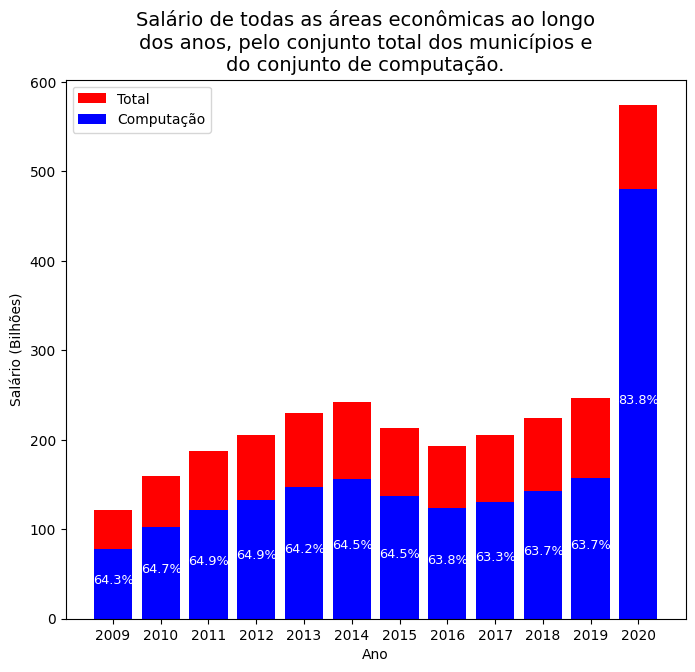

In [3]:
salario()

#### Comparação entre os anos, do salário das áreas econômicas de computação, nos municípios brasileiros (representados pela cor vermelha, e label: Total), e nos municípios que ofertam cursos de computação (representados pela cor azul, e label: Computação).

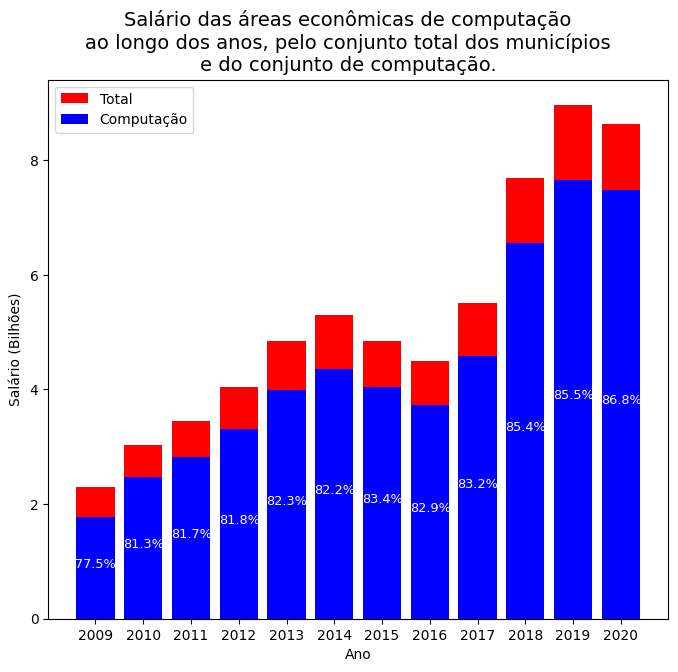

In [4]:
salario(True)

#### Comparação entre os anos, das admissões e desligamentos de todas as áreas econômicas, nos municípios brasileiros (representados pela cor vermelha, e label: Total), e nos municípios que ofertam cursos de computação (representados pela cor azul, e label: Computação).

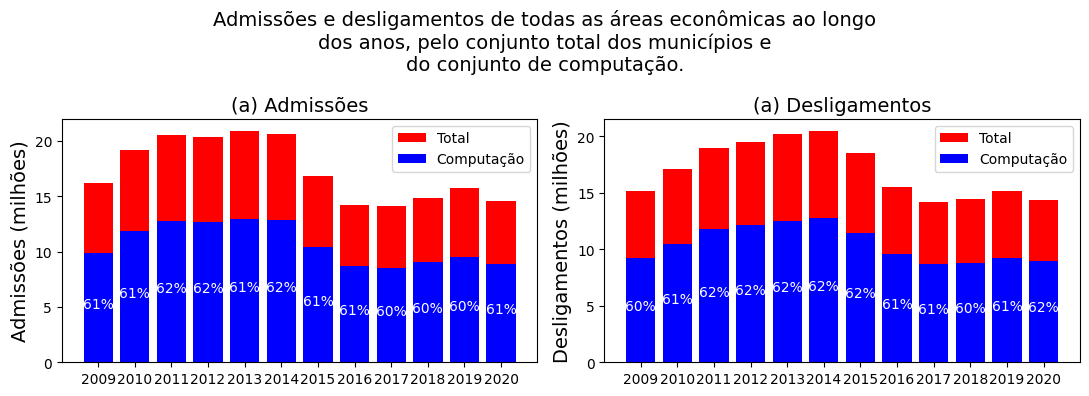

In [5]:
admissoesDesligamentos()

#### Comparação entre os anos, das admissões e desligamentos das áreas econômicas de computação, nos municípios brasileiros (representados pela cor vermelha, e label: Total), e nos municípios que ofertam cursos de computação (representados pela cor azul, e label: Computação).

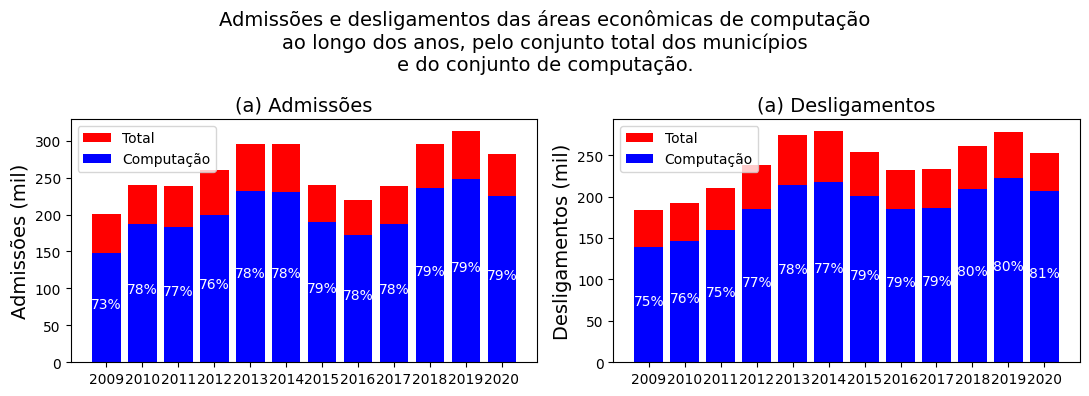

In [6]:
admissoesDesligamentos(True)

#### Comparação entre os anos, do saldo (contratações subtraído desligamentos) de todas as áreas econômicas, nos municípios brasileiros (representados pela cor vermelha, e label: Total), e nos municípios que ofertam cursos de computação (representados pela cor azul, e label: Computação).

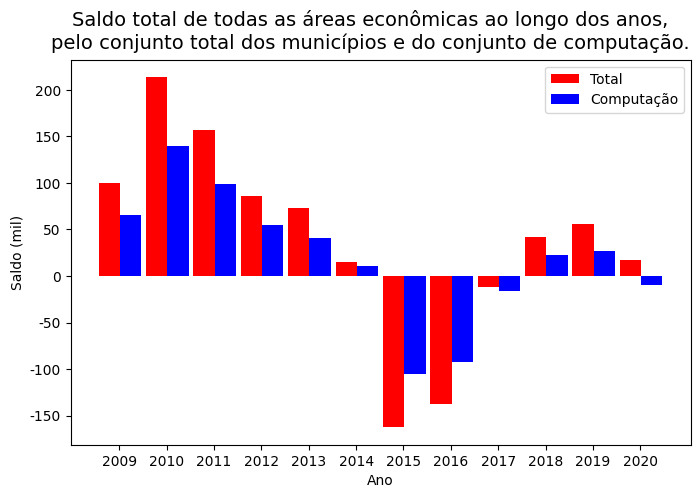

In [7]:
saldo()

#### Comparação entre os anos, do saldo (contratações subtraído desligamentos) das áreas econômicas de computação, nos municípios brasileiros (representados pela cor vermelha, e label: Total), e nos municípios que ofertam cursos de computação (representados pela cor azul, e label: Computação).

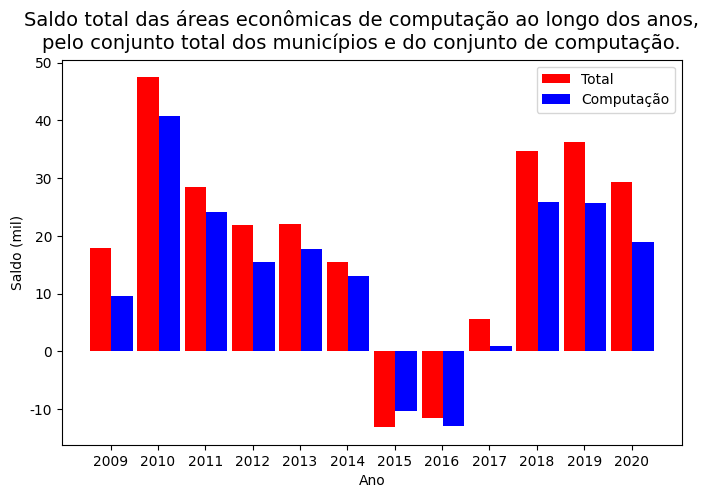

In [8]:
saldo(True)